In [1]:
import csv
import numpy as np
arr=[]
with open('out.data','r') as fin:
    cin=csv.reader(fin,delimiter=' ')
    for row in cin:
        row=[float(em) for em in row if em != '']
        if row != []:
            arr.append(row)

In [2]:
result=np.array(arr)
print(result.shape)

(280000, 2)


In [3]:
NSample=2000
r  =(result.shape[0])-NSample
rr =result.shape[0]

yy=result[r:rr, 1]

In [4]:
print(type(yy))
print(yy.shape)

<class 'numpy.ndarray'>
(2000,)


In [5]:
totalN=80000
yyy=np.pad(yy,(0,totalN-NSample),'constant')

In [6]:
print(type(yyy))
print(yyy.shape)

<class 'numpy.ndarray'>
(80000,)


In [37]:
T=0.000025
# sampling frequency is 40kHz
fs=40*1000
print('1 over fs =',1/fs)
Twindow=NSample*T
print('nonzero during Twindow:',Twindow)
stop=(totalN-1)*T
t=np.linspace(0,stop,totalN)
1/Twindow

1 over fs = 2.5e-05
nonzero during Twindow: 0.05


20.0

In [72]:
def predict_spec(f):
    return  0.5*Twindow*8500*np.sinc(Twindow*(f-3333))
predict_spec(3333)

212.5

80000
80000


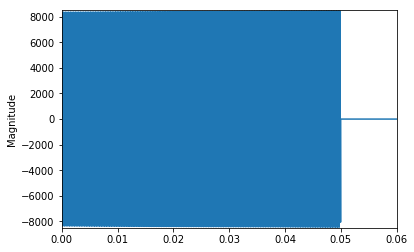

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.xlim(0,0.02)
#plt.plot(t,yyy)
ax=plt.axes()
ax.plot(t,yyy)
ax.set(xlim=(0,0.06),ylim=(-8500,8500),ylabel='Magnitude')
print(t.size)
print(yyy.size)

In [11]:
from scipy import fftpack
faX=fftpack.fft(yyy)
Xc=faX*T
Xcabs=np.abs(Xc)
print(Xcabs.shape)

(80000,)


80000
<class 'numpy.ndarray'>


array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

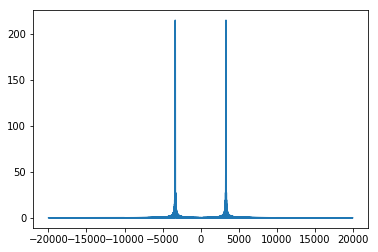

In [57]:
freqs=fftpack.fftfreq(totalN,T)
plt.plot(freqs,Xcabs)
np.max(Xcabs)
print(freqs.size)
print(type(freqs))
freqs[0:10]

[Text(0,0.5,'Magnitude'), (3310, 3355)]

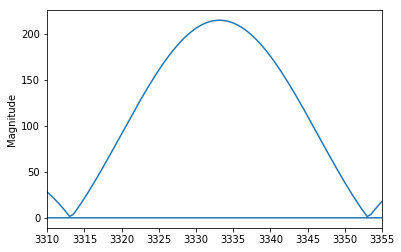

In [43]:
ax=plt.axes()
ax.plot(freqs,Xcabs)
ax.set(xlim=(3310,3355),ylabel='Magnitude')

[(-1, 217), Text(0,0.5,'Magnitude'), (3310, 3355)]

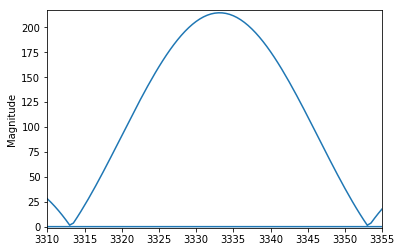

In [69]:
ax=plt.axes()
ax.plot(freqs,Xcabs)
ax.set(xlim=(3310,3355),ylim=(-1,217),ylabel='Magnitude'
      )

In [12]:
peak_result=np.where(Xcabs==np.max(Xcabs))
print(peak_result)
print(type(peak_result))

(array([ 6666, 73334]),)
<class 'tuple'>


In [13]:
peak_index=peak_result[0][0]
print(peak_index)

6666


In [14]:
print('The frequency is :' ,freqs[peak_index])

The frequency is : 3333.0


In [31]:
freqs[6664]

3332.0

In [44]:
freqs[6706]

3353.0

In [48]:
Xcabs[6706]

1.6003879618125265